In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import kagglehub
import os

In [ ]:
path = kagglehub.dataset_download("saifullah57/ushape-dataset")

print("Path to dataset files:", path)
print(os.listdir(path))

100%|██████████| 2.71k/2.71k [00:00<00:00, 4.80MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/saifullah57/ushape-dataset/versions/1
['ushape.csv']


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/saifullah57/ushape-dataset/versions/1/ushape.csv')

In [ ]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [ ]:
import matplotlib.pyplot as plt

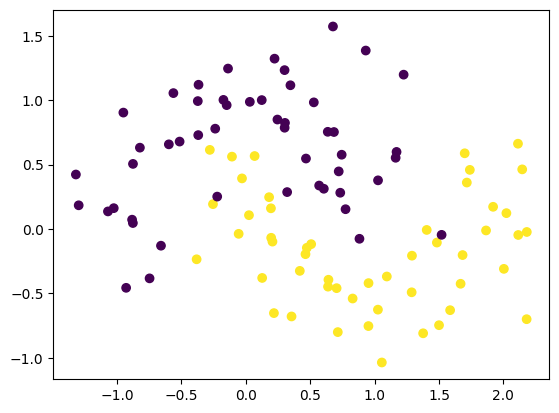

In [ ]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [ ]:
x = df.drop('class',axis=1)
y = df['class']

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.get_weights()

[array([[-0.02162892, -0.63632286,  0.03308272, -0.6113633 ,  0.35273224,
          0.17222214, -0.1806606 , -0.26774055,  0.14039129, -0.16365975],
        [-0.30323747,  0.33332747,  0.02424085,  0.32907134,  0.43976206,
         -0.03860718, -0.4531162 , -0.14679682, -0.06341499, -0.12232345]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.06490669, -0.37836975,  0.18740416, -0.36006504, -0.45940524,
         -0.19142875,  0.38904917,  0.34749132, -0.09220555,  0.5104228 ],
        [-0.36718273,  0.1392973 , -0.24238741,  0.04405648, -0.47473896,
          0.29325545,  0.49607694,  0.37890005, -0.54642457,  0.04725897],
        [-0.3589496 ,  0.06743318,  0.5102358 ,  0.31626153, -0.13877231,
         -0.46168375, -0.33253974,  0.5066346 ,  0.17998421,  0.32437932],
        [-0.25311568, -0.17322358,  0.03369427,  0.3665806 , -0.37264282,
         -0.42850858,  0.28533053,  0.49706888,  0.00593543,  0.3889448 ],
        [-0.07089

In [ ]:
initial_weights = model.get_weights()

In [ ]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

#only on tanh , sigmoid not on relu

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[-0.96902925,  0.06765382,  0.87446547,  0.37683925, -0.9062727 ,
          0.39235297,  0.7177959 , -0.08212826,  0.4790514 , -1.1383742 ],
        [ 0.9872197 , -0.492751  ,  0.5865162 , -0.66538763,  0.5739286 ,
          0.17398103,  0.21590343, -0.06664044,  0.25738993, -1.3729593 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.12242487, -0.09821675,  0.2146574 , -0.23084308,  0.20455657,
         -0.45636877, -0.14563096, -0.8036378 ,  0.33742055,  0.06139326],
        [ 0.03797696,  0.00791174, -0.12840673, -0.14707394,  0.22347574,
         -0.3386297 ,  0.19795561,  0.18163617, -0.39732626,  0.17513345],
        [-0.26585123,  0.20413147, -0.35327074, -0.4177675 , -0.18006247,
          0.17237201,  0.5088949 ,  0.282329  , -0.74692225, -0.12444387],
        [ 0.388867  ,  0.0586278 ,  0.06736956, -0.1204727 , -0.29732376,
          0.11977382,  0.37287912, -0.5287009 , -0.19034469, -0.02583052],
        [ 0.29263

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.7383 - loss: 0.6497 - val_accuracy: 0.8500 - val_loss: 0.6219
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7820 - loss: 0.6384 - val_accuracy: 0.8500 - val_loss: 0.6121
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7727 - loss: 0.6371 - val_accuracy: 0.8500 - val_loss: 0.6030
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7688 - loss: 0.6278 - val_accuracy: 0.8500 - val_loss: 0.5932
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8375 - loss: 0.6069 - val_accuracy: 0.8500 - val_loss: 0.5838
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7766 - loss: 0.6103 - val_accuracy: 0.8500 - val_loss: 0.5748
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7727 - loss: 0.6027 - val_accuracy: 0.8500 - val_loss: 0.5656
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7766 - loss: 0.5975 - val_accuracy: 0.8500 - val_loss

In [ ]:
model.get_weights()

[array([[-0.7754328 ,  0.18756385,  0.79439336,  0.34895325, -0.7339978 ,
          0.31553233,  0.67064136,  0.0022611 ,  0.449041  , -1.1555557 ],
        [ 1.1349859 , -0.5772484 ,  0.5191629 , -0.5987419 ,  0.68749267,
          0.301926  ,  0.14542823, -0.15483129,  0.35777164, -1.396375  ]],
       dtype=float32),
 array([ 0.11456461,  0.00262096,  0.13252263, -0.06472694,  0.04158356,
         0.04177123,  0.06547572, -0.00351251, -0.0493388 ,  0.2551769 ],
       dtype=float32),
 array([[-0.12359224,  0.01760297,  0.30242926, -0.36591047,  0.29631302,
         -0.5029846 , -0.17759645, -0.8984094 ,  0.43785086, -0.03134527],
        [-0.0220796 , -0.11572696, -0.24431811, -0.00946968,  0.11971172,
         -0.27246335,  0.31269476,  0.29176366, -0.5114273 ,  0.27561417],
        [-0.09239257,  0.19362153, -0.32082248, -0.36646968, -0.08175238,
          0.22877142,  0.33324164,  0.207124  , -0.6529372 , -0.06429888],
        [ 0.36959496, -0.07362811, -0.0447323 ,  0.0387039 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

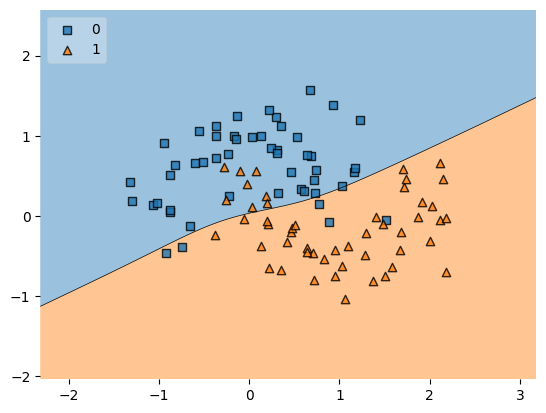

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.astype('int').values,clf=model,legend=2)

<Axes: xlabel='X', ylabel='Density'>

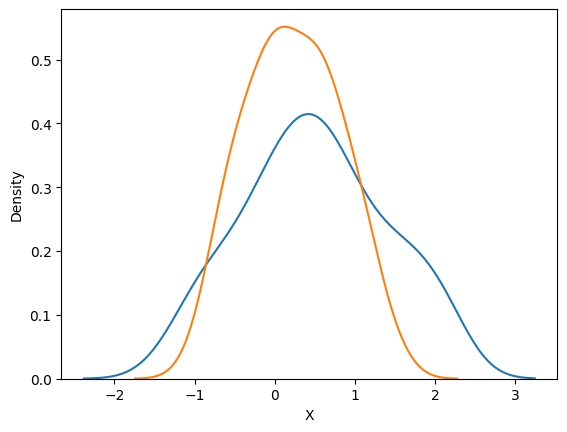

In [ ]:
import seaborn as sns
sns.kdeplot(df['X'])
sns.kdeplot(df['Y'])

In [ ]:
model = Sequential()

#for relu
#he_normal, he_uniform

#for tanh
#glorat_normal, glorat_uniform
model.add(Dense(10,activation='relu',input_dim = 2, kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.get_weights()

[array([[-0.80246437,  2.1753817 ,  0.24975927,  1.6807894 ,  0.41307476,
         -2.0478973 ,  0.29077727,  0.3678184 , -1.3164428 ,  0.92522377],
        [-0.7208663 ,  0.49718454, -1.5315703 ,  0.12117299, -0.23102002,
          2.2449663 ,  0.09124038,  0.46544313,  0.60043895, -1.0470428 ]],
       dtype=float32),
 array([ 0.18618858, -0.0948972 , -0.07713736,  0.10498793, -0.02355703,
         0.07035201,  0.1263761 ,  0.08774462,  0.0345346 ,  0.00217599],
       dtype=float32),
 array([[ 0.63518316,  0.5260761 , -0.15712675,  0.20175114,  0.7243804 ,
          0.30981323,  0.8743759 ,  0.10114237,  0.92663425, -0.3773199 ],
        [-0.07610115,  0.01324502,  0.4208514 ,  0.02193898, -0.45975566,
         -0.1325289 , -0.23836854, -0.44583347, -0.24136782, -0.46961996],
        [ 0.00986997, -0.07165685, -0.06893581,  0.6554883 , -0.09686825,
          0.3892419 , -0.62522936,  0.22777118, -0.31462222, -0.35443857],
        [ 0.00342546, -0.10930625,  0.34842074, -0.18083231, 

In [ ]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8844 - loss: 0.3328 - val_accuracy: 0.9500 - val_loss: 0.2443
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8570 - loss: 0.3570 - val_accuracy: 0.9500 - val_loss: 0.2409
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8844 - loss: 0.3156 - val_accuracy: 0.9500 - val_loss: 0.2379
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8297 - loss: 0.3739 - val_accuracy: 0.9500 - val_loss: 0.2373
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8648 - loss: 0.3513 - val_accuracy: 0.9500 - val_loss: 0.2354
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8297 - loss: 0.3715 - val_accuracy: 0.9500 - val_loss: 0.2325
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8727 - loss: 0.3335 - val_accuracy: 0.9500 - val_loss: 0.2288
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8727 - loss: 0.3225 - val_accuracy: 0.9500 - val_loss:

In [ ]:
model.get_weights()

[array([[-0.5975778 ,  2.192929  ,  0.09787219,  1.6964036 ,  0.4076953 ,
         -2.1362267 ,  0.2909861 ,  0.38220373, -1.4625148 ,  0.95664144],
        [-0.7654711 ,  0.5040627 , -1.5350416 ,  0.1816852 , -0.2634472 ,
          2.1600146 ,  0.18995172,  0.5260454 ,  0.5135622 , -1.0793415 ]],
       dtype=float32),
 array([ 0.48279235, -0.22251427, -0.19920504,  0.16487436, -0.1616118 ,
        -0.10524883,  0.2880901 ,  0.20539702, -0.09563859, -0.10055122],
       dtype=float32),
 array([[ 7.07044065e-01,  5.40994167e-01,  1.03312254e-01,
          3.65714550e-01,  8.42578292e-01,  3.09673488e-01,
          9.87651229e-01,  1.76091313e-01,  9.52570975e-01,
         -7.46493399e-01],
        [ 1.31723002e-01,  1.12014472e-01,  4.95033115e-01,
          6.17632605e-02, -4.55832809e-01, -1.25616938e-01,
         -3.45015168e-01, -4.10137624e-01, -3.23206067e-01,
         -4.63062435e-01],
        [ 1.03757747e-01, -6.14977516e-02, -4.57202829e-02,
          6.58137918e-01, -8.40992

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

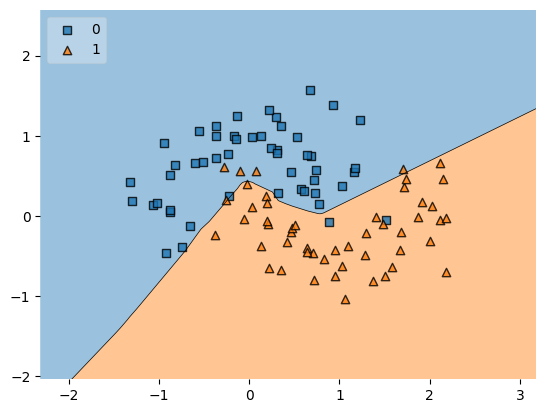

In [ ]:
plot_decision_regions(x.values,y.astype('int').values,clf=model,legend=2)